# Unsupervised Learning

**Unsupervised Learningde sonuclarin yorumlanmasi, sonucun kendisinden daha onemlidir.** -Arthur Mentor-

**Unsupervised modellemenin pratikte amaci su sekilde ifade edilebilir:**
1)     En belirgin ve optimal kümeleri kesfedebilmek (Bu sayede kampanyalar düzenlenebilir, yeni sosyal tabakalar kesfedilebilir yada calisilan domainde/alanda önceden bilinmeyen yeni gruplari bir araya getiren özellikler bütüncül olarak kesfedilebilir.)

2)     Klasik supervised modeling kisminda calismalarimiz beklenen neticeyi vermediginde ve özellikle multicollinearity (featurelar arasi asiri correlation olmasi durumu) riskleriyle karsilasildiginda featurelari ortaklayarak yeni bir feature ile yeniden modele gidebilmenin önünü acmaya calismak.

# Clustering Algorithms
* Clustering ( Kümeleme ) bir veri setinde benzer özellikler gösteren verilerin gruplara ayrılmasına denir. Aynı küme içinde benzerlikler fazla, kümeler arası benzerlikler azdır. K-Means ve Hiyerarşik Bölütleme yaygın olarak kullanılan kümeleme algoritmalarındandır. 
* Bu algoritmalar müşteri segmentasyonu, pazar segmentasyonu, bilgisayar ile görü gibi alanlarda sıkça kullanılırlar.

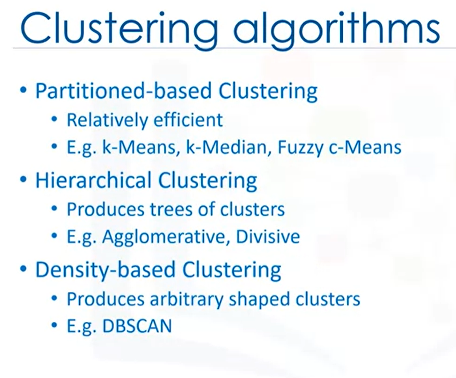

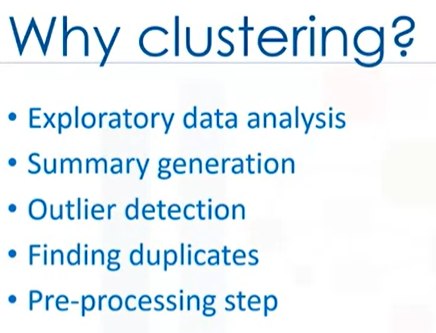

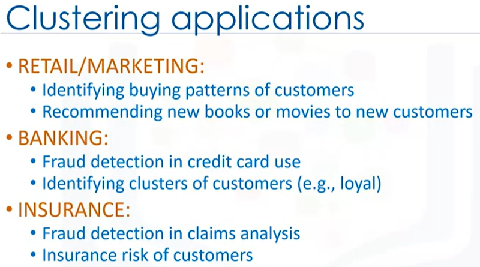

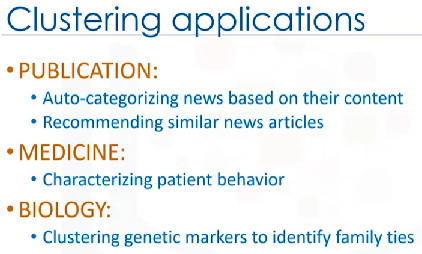

# K-Means Clustering
* 10K dan kücük durumlarda K-means uygun değildir. 
* 10K dan büyük veriler icin farkli yöntemler gerekiyor Kmeansin daha gelismis hali MiniBatch kullaniliyor ama genel olarak kümele probleminde 10K dan büyük veri uygun görülmüyor.
* k, küme sayisi. “Her küme kendi içinde benzeşsin ama kümeler kendi arasinda benzeşmesin” mottosuyla calisir. Yani farklilasma kriteri vardir. Kume içindeki ornekler arasinda saflar sık olsun, kümeler arasinda uzak olsun.
* Iteratif tabanli bir yaklasimdir. K adet kümenin en iyi merkezlerini(centroids) bulmaya odaklanir. Bir nevi agirlik merkezi gibi düşünülebilir.
* Nasil calisir? k adet küme rastgele veri orneklerinden seçilir. Herbir data sample in centroids e yakinligina bakarak en yakin olan kümeye dahil edilir. Küme siniri tekrar çizilir. Bu sekilde bir iterasyonla tum data set islenerek nihai küme sinirlari belirlenmiş olur.
* Her sample için centroid e uzakligin karesi hata değeri oluyor. Karesel hatalarin toplami ne zaman ki sabit bir değere ulaşır ve değişmez orada iterasyonu durduruyoruz.
* Distance function: Euclidean mesafe fonksiyonuna gore en yakin küme merkezine datayi atama
* optimizasyon kriteri: iterasyonu ne zaman durduracagim
* `k means algorithm requires scaling!!!!!`
* Ancak burada degerler birbirine yakin hepsi ayni olcekte, yani bir sutun km iken digeri metre ve HP cinsinden  degil. Burada scaling yapilmasada olur.

* `K-Medians is another clustering algorithm` related to K-Means, except instead of recomputing the group center points using the mean we use the median vector of the group. This method is less sensitive to outliers (because of using the Median) but is much slower for larger datasets as sorting is required on each iteration when computing the Median vector.

* `Mean shift clustering` is a sliding-window-based algorithm that attempts to find dense areas of data points. It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window. These candidate windows are then filtered in a post-processing stage to eliminate near-duplicates, forming the final set of center points and their corresponding groups

* `Density-Based Spatial Clustering of Applications with Noise (DBSCAN)` is a density-based clustered algorithm similar to mean-shift, but with a couple of notable advantages

In [1]:
import pandas as pd     
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#import pandas_profiling
#import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


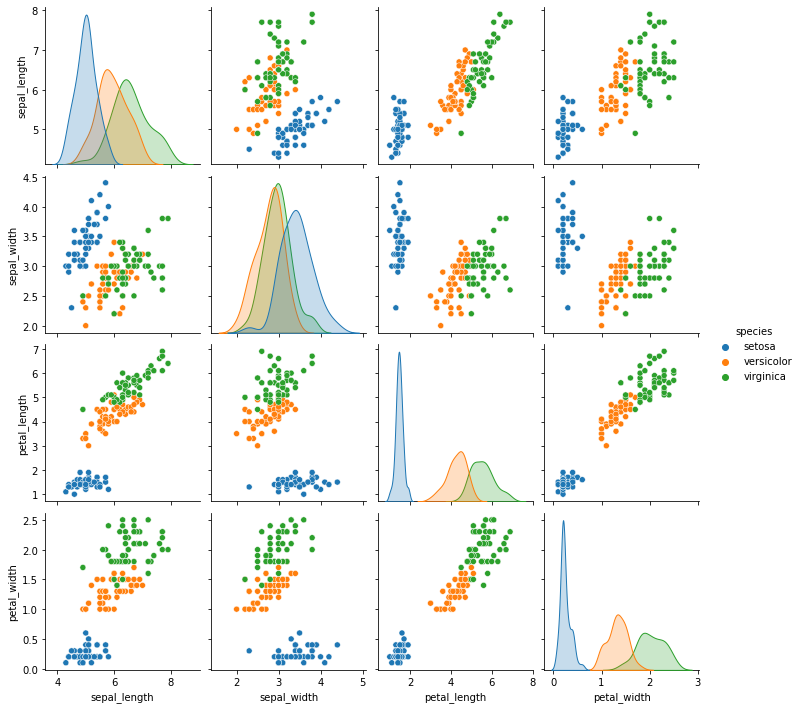

In [6]:
sns.pairplot(df, hue="species")
plt.show()

In [7]:
X=df.drop("species", axis=1)
X.shape

(150, 4)

* Clustering calisacagimiz icin labeli drop ettik.

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


> Zaman ve maliyet verimliliği için, İlk olarak Veride kümeleme eğilimi var mi yok mu belirlemek için ``Hopkins Testi`` yapılır. 

**Hopkins Test**
* Null Hypothesis(Ho) ve Alternative Hypothesis(Ha) temeline dayaniyor.
* Null Hypothesis(Ho): Uniform dagilim var, anlamli kümeleme yok.
* Alternative Hypothesis(Ha):  Veri, ratsgele veri noktalarindan oluşur. Yani Kumeleme vardir.
* [0,1] araliginda bir score verir. score, 0’a yaklaştıkça veri uniform degil,yani clusteringe meyilli
* 1’e yaklaştıkça uniform yapi var, 0.5 gecmedikce kümelenebilir olarak ifade edilir. pratikte 0.3 sinir alinir.


In [9]:
# pip install pyclustertend
from pyclustertend import hopkins

In [10]:
X.shape

(150, 4)

In [11]:
hopkins(X, X.shape[0])

0.17006767887304763

* Hopkins scoruna bakarak yuksek clustering egilimi oldugu soylenebilir.

**`k nasil belirleniyor?`**
* Domain Knowledge: Alan uzmani desteği gerekiyor. Musterinin veya ilgili domain expertinin bilgisine başvurulur.
* Data Driven approach: Elbow Method


**Elbow Method**
* aciklanan varyans(Sum of squared distances) ve küme sayisi(k) arasindaki ilişkiye dayanarak cozum geliştiren bir yöntem, 
* yani aciklanan varyans, küme sayisinin fonksiyonu olarak çizilir, grafikte dirseğin kirildigi nokta, k nin optimal degeridir
* minimum k ile minimum hatanin alindigi optimum noktayi baz alacagiz. Keskin dususun en son bittigi yeri alacagiz. 

In [12]:
ssd = [] # Sum of Squared Distances
K = range(1,10) # different k Values

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

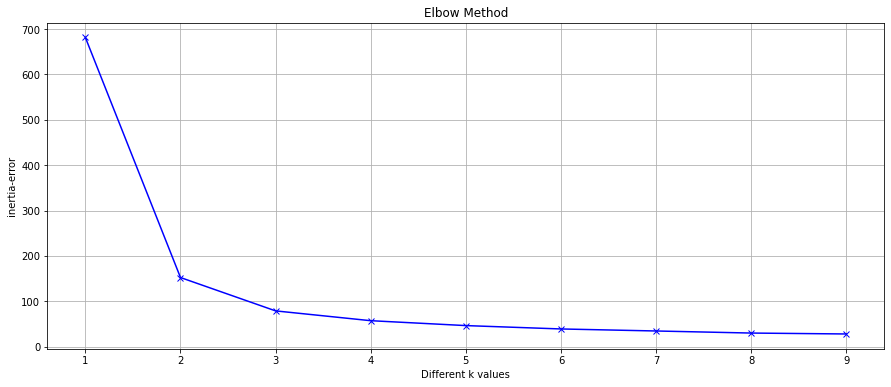

In [13]:
plt.figure(figsize=(15,6))
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")
plt.grid()
plt.show()

In [14]:
# # Alternative
# plt.figure(figsize=(10,6))
# sns.lineplot(x=K, y = ssd, markers='o');

In [15]:
model=KMeans(n_clusters = 3)
model.fit(X)
model

KMeans(n_clusters=3)

In [16]:
model.inertia_ # grafikte k=3, 78.85 e denk geliyor

78.851441426146

In [17]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

* > Normally, these labels are inserted to the X.
* > Bu data setinde label larda elimizde oldugu icin modelin clusterlarini labels ile karsilastiralim

In [18]:
df['predicted_clusters']=model.labels_

In [19]:
ct = pd.crosstab(df.species,df['predicted_clusters'])
ct

predicted_clusters,0,1,2
species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,14,0,36


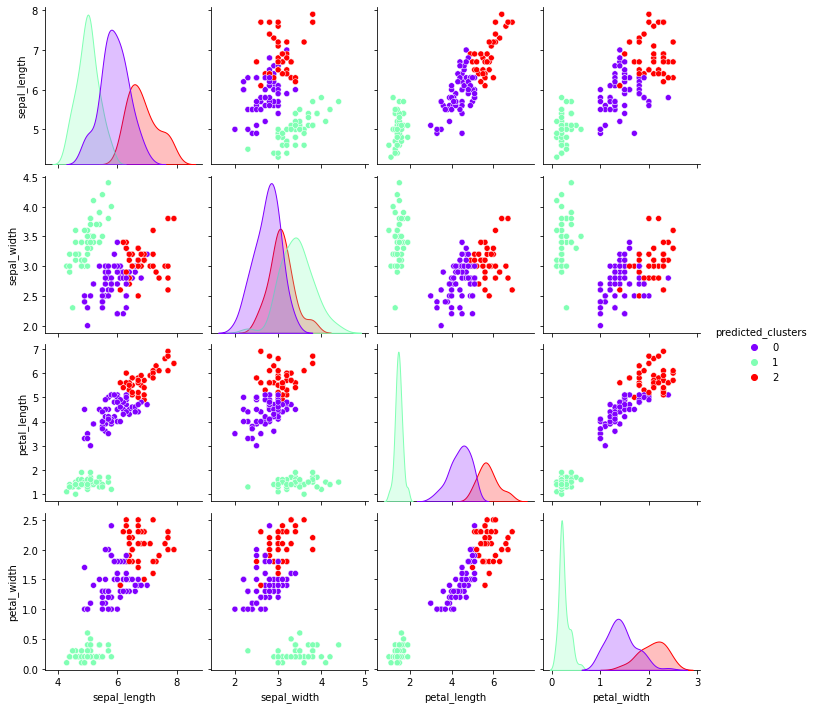

In [20]:
sns.pairplot(df, hue="predicted_clusters",palette='rainbow')
plt.show();

In [21]:
centers=model.cluster_centers_

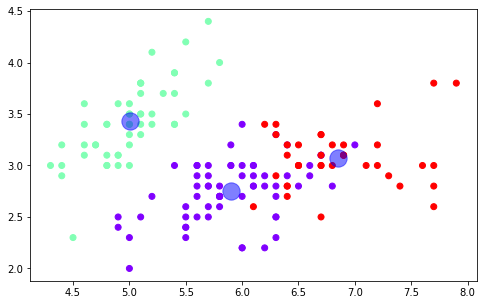

In [22]:
plt.figure(figsize = (8,5))
plt.scatter(df.iloc[:,0], df.iloc[:,1],c=df['predicted_clusters'], cmap="rainbow")
plt.scatter(centers[:,0], centers[:,1], c="blue", s=300, alpha=0.5);

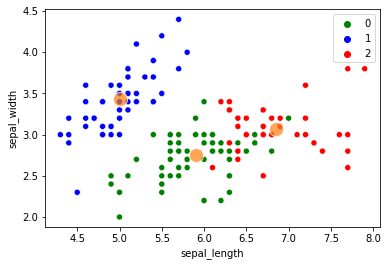

In [23]:
# #Alternative

# ax=sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=model.labels_, palette=['green','blue','red']);
# sns.scatterplot(x=centers[:,0],y=centers[:,1],s=200, alpha=0.7, ax=ax);

# Hierarchy Clustering
* Hiyerarşik kümeleme adındanda anlaşılacağı üzere bir kümeleme algoritmasıdır. Agglomerative ( Parçadan bütüne ) ve Divisive ( Bütünden parçaya ) olarak iki farklı varyasyonu vardır.
* Agglomerative: ilk önce tüm veriler bir küme haline getirilir yani N tane eleman varsa N tane küme oluşur. Daha sonra birbirine mesafe olarak yakın olan kümeler birleşerek yeni bir küme oluşturur. Bu durum sistem kararlı oluncaya kadar devam eder. Divisive ise Agglomerative’ in tam tersidir. İlk başta tüm veriler tek bir küme oluşturulur. Daha sonra bu küme parçalanarak kümeleme işlemi yapılır.

In [125]:
# from scipy.cluster.hierarchy import linkage, dendrogram
# from sklearn.cluster import AgglomerativeClustering

In [126]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [127]:
hc_complete =  linkage(X,"complete")
hc_ward = linkage(X, "ward")
hc_single = linkage(X, "single")

**complete**

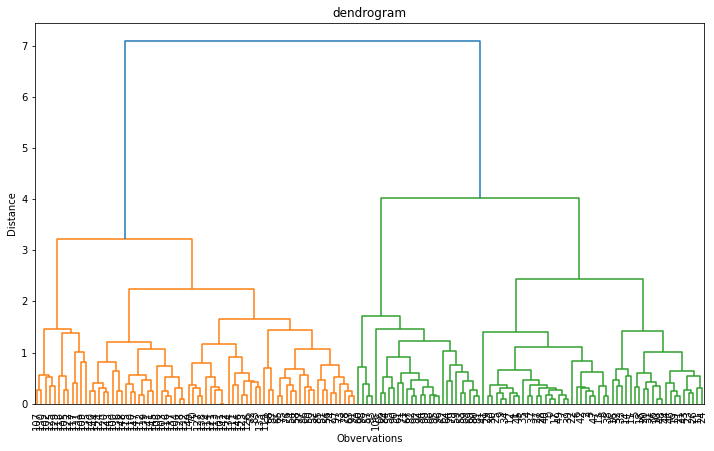

In [128]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

**ward**

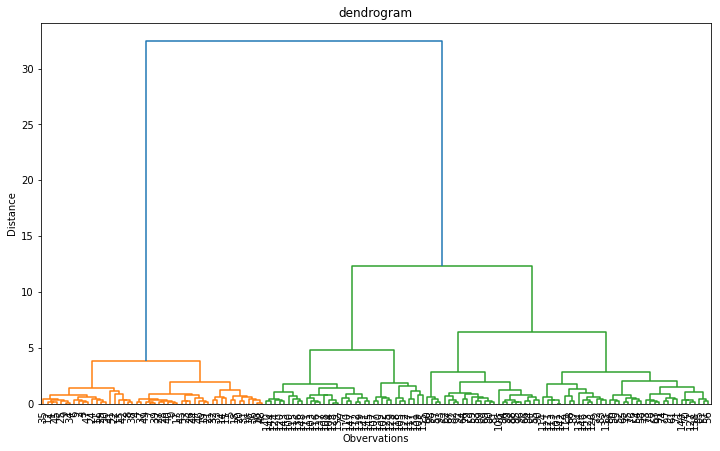

In [129]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

**single**

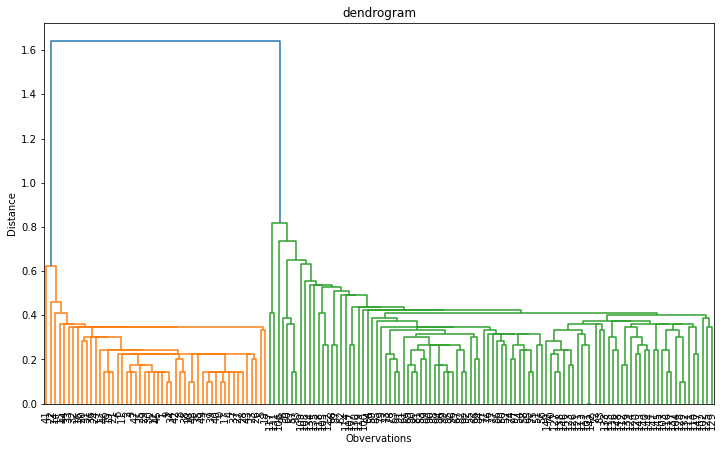

In [130]:
plt.figure(figsize = (12,7))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [131]:
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward') # burada default linkage='ward' dur.
hc.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

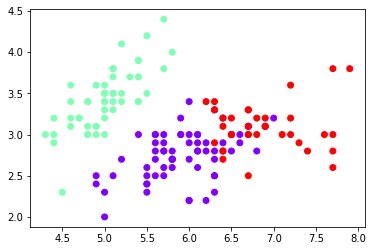

In [132]:
# plt.figure(figsize = (10,7))
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=hc.labels_,cmap="rainbow");

In [133]:
df["predicted_clusters"] = hc.labels_
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1


In [134]:
pd.crosstab(df.species, df.predicted_clusters)

predicted_clusters,0,1,2
species,,,
setosa,0,50,0
versicolor,49,0,1
virginica,15,0,35


In [135]:
map_dict = {"virginica":2,
             "setosa": 1,
             "versicolor":0}

In [136]:
df["original_classes"] = df.species.map(map_dict)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,predicted_clusters,original_classes
148,6.2,3.4,5.4,2.3,virginica,2,2
112,6.8,3.0,5.5,2.1,virginica,2,2
97,6.2,2.9,4.3,1.3,versicolor,0,0
27,5.2,3.5,1.5,0.2,setosa,1,1
34,4.9,3.1,1.5,0.2,setosa,1,1


In [137]:
# Alternative
# df['original_classes']=df['species'].apply(lambda x:1 if x=='setosa' else 2 if x=='virginica' else 0)

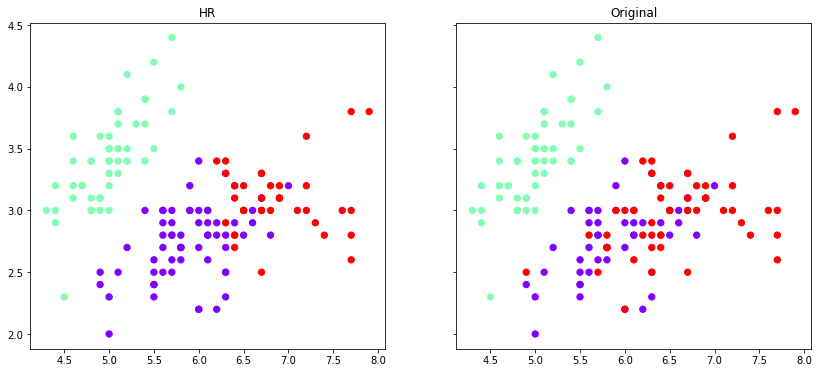

In [142]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6)) # sharey=True ile y eksen labels lari ortak kullanirlar.
ax1.set_title('HR')
ax1.scatter(df.iloc[:,0], df.iloc[:,1], c = df.predicted_clusters, s = 40, cmap = "rainbow") # s=40 ,dot size
ax2.set_title("Original")
ax2.scatter(df.iloc[:,0], df.iloc[:,1], c = df.original_classes, s = 40, cmap = "rainbow");

**Evaluation Metrics**

In [139]:
print(f'Silhouette Score(n=3): {silhouette_score(X, hc.labels_)}')

Silhouette Score(n=3): 0.5543236611296426


In [140]:
adjusted_rand_score(df['species'], df['predicted_clusters'])

0.7311985567707745